In [ ]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

# Scrapes transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find_all("div", class_="elementor-widget-theme-post-content") ]
    print(url)
    return text

# URLs of transcripts in scope
urls = ['https://scrapsfromtheloft.com/movies/the-batman-2022-transcript/',
         'https://scrapsfromtheloft.com/movies/the-suicide-squad-2021-transcript/',
         'https://scrapsfromtheloft.com/movies/free-guy-2021-transcript/',
         'https://scrapsfromtheloft.com/movies/matrix-resurrections-transcript/',
         'https://scrapsfromtheloft.com/movies/the-kings-man-2021-transcript/',
         'https://scrapsfromtheloft.com/comedy/shang-chi-legend-of-ten-rings-transcript/',
         'https://scrapsfromtheloft.com/comedy/venom-let-there-be-carnage-transcript/',
         'https://scrapsfromtheloft.com/movies/black-widow-2021-transcript/']

# Movie names
movies = ['the-batman', 'suicide-squad', 'free-guy', 'matrix-resurrections', 'the-kingsman', 'shangchi', 'venom', 'blackwidow']

In [ ]:
# Actually request transcripts (takes a few minutes to run)
transcripts = [url_to_transcript(u) for u in urls]

https://scrapsfromtheloft.com/movies/the-batman-2022-transcript/
https://scrapsfromtheloft.com/movies/the-suicide-squad-2021-transcript/
https://scrapsfromtheloft.com/movies/free-guy-2021-transcript/
https://scrapsfromtheloft.com/movies/matrix-resurrections-transcript/
https://scrapsfromtheloft.com/movies/the-kings-man-2021-transcript/
https://scrapsfromtheloft.com/comedy/shang-chi-legend-of-ten-rings-transcript/
https://scrapsfromtheloft.com/comedy/venom-let-there-be-carnage-transcript/
https://scrapsfromtheloft.com/movies/black-widow-2021-transcript/


In [ ]:
%cd /content/drive/MyDrive/Kuliah/MSIB/

/content/drive/MyDrive/Kuliah/MSIB


In [ ]:
# !mkdir tugas_technique

In [ ]:
%cd tugas_technique

/content/drive/MyDrive/Kuliah/MSIB/tugas_technique


In [ ]:
# !mkdir new_transcripts

In [ ]:
for i, c in enumerate(movies):
    with open("new_transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

In [ ]:
# Load pickled files
data = {}
for i, c in enumerate(movies):
    with open("new_transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [ ]:
# Double check to make sure data has been loaded properly
data.keys()

dict_keys(['the-batman', 'suicide-squad', 'free-guy', 'matrix-resurrections', 'the-kingsman', 'shangchi', 'venom', 'blackwidow'])

# Cleaning the data

In [ ]:
# We are going to change this to key: comedian, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [ ]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [ ]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
blackwidow,"\n\nFollowing the events of Captain America: Civil War (2016), Natasha Romanoff finds herself on the run and forced to confront a dangerous conspi..."
free-guy,"\n\nIn Twentieth Century Studios’ epic adventure-comedy Free Guy, a bank teller who discovers he is actually a background player in an open-world ..."
matrix-resurrections,"\n\nReturn to a world of two realities: one, everyday life; the other, what lies behind it. To find out if his reality is a construct, to truly kn..."
shangchi,"\n\nShang-Chi is a young man who is in denial about his vocation and his magnificent warrior destiny; he lives in San Francisco, calls himself “Sh..."
suicide-squad,"\n\nUnder orders from intelligence officer Amanda Waller, thirteen inmates from Belle Reve penitentiary—former psychiatrist Harley Quinn; man-eati..."
the-batman,\n\nThe Riddler gruesomely murders the mayor of Gotham and tapes to the victim’s body a greeting card for the Batman and other clues to his motive...
the-kingsman,"\n\nAs a collection of history’s worst tyrants and criminal masterminds gather to plot a war to wipe out millions, one man must race against time ..."
venom,"\n\nIn 1996, a young Cletus Kasady watches helplessly as his love, Frances Barrison, is taken away from St. Estes Home for Unwanted Children to th..."


In [ ]:
# Let's take a look at the transcript for the-batman 
data_df.transcript.loc['the-batman']

'\n\nThe Riddler gruesomely murders the mayor of Gotham and tapes to the victim’s body a greeting card for the\xa0Batman and other clues\xa0to his motives and to his next victim—to the conspiracy that he has discovered and the perpetrators he’s targeting. In taunting the Batman by dosing him with knowledge, the Riddler is also making him an unwilling but inextricable ally, both forcing him to join in the same fight and informing him of the underlying and overarching truth about Gotham, about the social order that the avenging masked man is dedicated to defending and preserving.\n\n* * *\n[Franz Schubert’s “Ave Maria” playing]\n[heavy breathing]\n[can pops open]\n[footsteps echoing]\n[people on street talking indistinctly]\n[siren wailing in distance]\n[heavy breathing continues]\n[“Ave Maria” continues playing]\n[girl squeals and laughs]\n[muffled groaning]\n[man] Hey!\n[newscaster on TV] …a dark and stormy Halloween.\n[news jingle plays on TV]\nGood evening and welcome to GC-1 News li

In [ ]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('\(.*?\)', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [ ]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
blackwidow,\n\nfollowing the events of captain america civil war natasha romanoff finds herself on the run and forced to confront a dangerous conspiracy ...
free-guy,\n\nin twentieth century studios’ epic adventure comedy free guy a bank teller who discovers he is actually a background player in an open world ...
matrix-resurrections,\n\nreturn to a world of two realities one everyday life the other what lies behind it to find out if his reality is a construct to truly kn...
shangchi,\n\nshang chi is a young man who is in denial about his vocation and his magnificent warrior destiny he lives in san francisco calls himself “sh...
suicide-squad,\n\nunder orders from intelligence officer amanda waller thirteen inmates from belle reve penitentiary—former psychiatrist harley quinn man eati...
the-batman,\n\nthe riddler gruesomely murders the mayor of gotham and tapes to the victim’s body a greeting card for the batman and other clues to his motive...
the-kingsman,\n\nas a collection of history’s worst tyrants and criminal masterminds gather to plot a war to wipe out millions one man must race against time ...
venom,\n\nin a young cletus kasady watches helplessly as his love frances barrison is taken away from st estes home for unwanted children to the r...


In [ ]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…♪]', ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\xa0', ' ', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [ ]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
blackwidow,following the events of captain america civil war natasha romanoff finds herself on the run and forced to confront a dangerous conspiracy wi...
free-guy,in twentieth century studios epic adventure comedy free guy a bank teller who discovers he is actually a background player in an open world vi...
matrix-resurrections,return to a world of two realities one everyday life the other what lies behind it to find out if his reality is a construct to truly know...
shangchi,shang chi is a young man who is in denial about his vocation and his magnificent warrior destiny he lives in san francisco calls himself shau...
suicide-squad,under orders from intelligence officer amanda waller thirteen inmates from belle reve penitentiary—former psychiatrist harley quinn man eating...
the-batman,the riddler gruesomely murders the mayor of gotham and tapes to the victim s body a greeting card for the batman and other clues to his motives ...
the-kingsman,as a collection of history s worst tyrants and criminal masterminds gather to plot a war to wipe out millions one man must race against time to...
venom,in a young cletus kasady watches helplessly as his love frances barrison is taken away from st estes home for unwanted children to the rav...


In [ ]:
data_clean.transcript.loc['suicide-squad']

'  under orders from intelligence officer amanda waller  thirteen inmates from belle reve penitentiary—former psychiatrist harley quinn  man eating hybrid nanaue  australian thief captain boomerang  hitman bloodsport  violent extremist peacemaker  metahumans t d k  and polka dot man  computer hacker savant  mercenary blackguard  former olympic athlete javelin  alien warrior mongal  rat controlling robber ratcatcher    and cannibalistic humanoid weasel—are  recruited  as task force x to destroy jötunheim  a nazi era prison and laboratory in the south american island nation of corto maltese that holds political prisoners and a site for secretive experiments  the team have explosive devices in their skulls  which can be detonated at any moment if they fail to follow waller s orders         hello  i m johnny cash        i hear the train a comin  it s rolling round the bend     and i ain t seen the sunshine since i don t know when     i m stuck in folsom prison     and time keeps draggin  o

## corpus

In [ ]:
# Let's take a look at our dataframe
data_df

,transcript
blackwidow,"\n\nFollowing the events of Captain America: Civil War (2016), Natasha Romanoff finds herself on the run and forced to confront a dangerous conspi..."
free-guy,"\n\nIn Twentieth Century Studios’ epic adventure-comedy Free Guy, a bank teller who discovers he is actually a background player in an open-world ..."
matrix-resurrections,"\n\nReturn to a world of two realities: one, everyday life; the other, what lies behind it. To find out if his reality is a construct, to truly kn..."
shangchi,"\n\nShang-Chi is a young man who is in denial about his vocation and his magnificent warrior destiny; he lives in San Francisco, calls himself “Sh..."
suicide-squad,"\n\nUnder orders from intelligence officer Amanda Waller, thirteen inmates from Belle Reve penitentiary—former psychiatrist Harley Quinn; man-eati..."
the-batman,\n\nThe Riddler gruesomely murders the mayor of Gotham and tapes to the victim’s body a greeting card for the Batman and other clues to his motive...
the-kingsman,"\n\nAs a collection of history’s worst tyrants and criminal masterminds gather to plot a war to wipe out millions, one man must race against time ..."
venom,"\n\nIn 1996, a young Cletus Kasady watches helplessly as his love, Frances Barrison, is taken away from St. Estes Home for Unwanted Children to th..."


In [ ]:
full_names = ['Black Widow', 'free-guy', 'matrix-resurrections', 
              'Shang Chi and the Legend of the Ten Rings', 'suicide-squad', 'the-batman', 'the-kingsman' , 'venom']

data_df['full_name'] = full_names
data_df

,transcript,full_name
blackwidow,"\n\nFollowing the events of Captain America: Civil War (2016), Natasha Romanoff finds herself on the run and forced to confront a dangerous conspi...",Black Widow
free-guy,"\n\nIn Twentieth Century Studios’ epic adventure-comedy Free Guy, a bank teller who discovers he is actually a background player in an open-world ...",free-guy
matrix-resurrections,"\n\nReturn to a world of two realities: one, everyday life; the other, what lies behind it. To find out if his reality is a construct, to truly kn...",matrix-resurrections
shangchi,"\n\nShang-Chi is a young man who is in denial about his vocation and his magnificent warrior destiny; he lives in San Francisco, calls himself “Sh...",Shang Chi and the Legend of the Ten Rings
suicide-squad,"\n\nUnder orders from intelligence officer Amanda Waller, thirteen inmates from Belle Reve penitentiary—former psychiatrist Harley Quinn; man-eati...",suicide-squad
the-batman,\n\nThe Riddler gruesomely murders the mayor of Gotham and tapes to the victim’s body a greeting card for the Batman and other clues to his motive...,the-batman
the-kingsman,"\n\nAs a collection of history’s worst tyrants and criminal masterminds gather to plot a war to wipe out millions, one man must race against time ...",the-kingsman
venom,"\n\nIn 1996, a young Cletus Kasady watches helplessly as his love, Frances Barrison, is taken away from St. Estes Home for Unwanted Children to th...",venom


In [ ]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

In [ ]:
data_clean['full_name'] = full_names
data_clean

,transcript,full_name
blackwidow,following the events of captain america civil war natasha romanoff finds herself on the run and forced to confront a dangerous conspiracy wi...,Black Widow
free-guy,in twentieth century studios epic adventure comedy free guy a bank teller who discovers he is actually a background player in an open world vi...,free-guy
matrix-resurrections,return to a world of two realities one everyday life the other what lies behind it to find out if his reality is a construct to truly know...,matrix-resurrections
shangchi,shang chi is a young man who is in denial about his vocation and his magnificent warrior destiny he lives in san francisco calls himself shau...,Shang Chi and the Legend of the Ten Rings
suicide-squad,under orders from intelligence officer amanda waller thirteen inmates from belle reve penitentiary—former psychiatrist harley quinn man eating...,suicide-squad
the-batman,the riddler gruesomely murders the mayor of gotham and tapes to the victim s body a greeting card for the batman and other clues to his motives ...,the-batman
the-kingsman,as a collection of history s worst tyrants and criminal masterminds gather to plot a war to wipe out millions one man must race against time to...,the-kingsman
venom,in a young cletus kasady watches helplessly as his love frances barrison is taken away from st estes home for unwanted children to the rav...,venom


## document-term matrix

In [ ]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aah,abandoned,abdication,abide,abilities,ability,able,abner,aboard,abode,...,zero,zeros,zest,zimmermann,zion,zombies,zone,zones,zorro,zucker
blackwidow,0,3,0,0,0,0,3,0,0,1,...,1,0,0,0,0,0,0,1,0,0
free-guy,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,1,0,1,0,0
matrix-resurrections,0,0,0,1,0,0,3,0,0,0,...,2,1,0,0,6,0,2,0,0,1
shangchi,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
suicide-squad,0,0,0,0,2,0,1,3,1,0,...,1,0,0,0,0,0,0,0,0,0
the-batman,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
the-kingsman,0,0,2,0,0,0,1,0,0,0,...,0,0,1,4,0,0,0,0,0,0
venom,1,0,0,0,0,1,3,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm_new.pkl")

In [ ]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv_new.pkl", "wb"))

# Sentiment analysis

In [ ]:
import pandas as pd

data_sen = pd.read_pickle('data_clean.pkl')
data_sen.head()

,transcript,full_name
blackwidow,following the events of captain america civil war natasha romanoff finds herself on the run and forced to confront a dangerous conspiracy wi...,Black Widow
free-guy,in twentieth century studios epic adventure comedy free guy a bank teller who discovers he is actually a background player in an open world vi...,free-guy
matrix-resurrections,return to a world of two realities one everyday life the other what lies behind it to find out if his reality is a construct to truly know...,matrix-resurrections
shangchi,shang chi is a young man who is in denial about his vocation and his magnificent warrior destiny he lives in san francisco calls himself shau...,Shang Chi and the Legend of the Ten Rings
suicide-squad,under orders from intelligence officer amanda waller thirteen inmates from belle reve penitentiary—former psychiatrist harley quinn man eating...,suicide-squad


In [ ]:
from textblob import TextBlob

In [ ]:
#polarity
pol = lambda x: TextBlob(x).sentiment.polarity

#subjectivity
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [36]:
# apply fungsi lambda ke dataframe

data_sen['polarity'] = data_sen['transcript'].apply(pol)
data_sen['subjectivity'] = data_sen['transcript'].apply(sub)

In [40]:
# tadinya ada yg typo 
data_sen = data_sen.drop(['subjectivit'], axis=1)

In [41]:
data_sen

,transcript,full_name,polarity,subjectivity
blackwidow,following the events of captain america civil war natasha romanoff finds herself on the run and forced to confront a dangerous conspiracy wi...,Black Widow,0.117298,0.494227
free-guy,in twentieth century studios epic adventure comedy free guy a bank teller who discovers he is actually a background player in an open world vi...,free-guy,0.107343,0.535892
matrix-resurrections,return to a world of two realities one everyday life the other what lies behind it to find out if his reality is a construct to truly know...,matrix-resurrections,0.084514,0.537339
shangchi,shang chi is a young man who is in denial about his vocation and his magnificent warrior destiny he lives in san francisco calls himself shau...,Shang Chi and the Legend of the Ten Rings,0.123589,0.508846
suicide-squad,under orders from intelligence officer amanda waller thirteen inmates from belle reve penitentiary—former psychiatrist harley quinn man eating...,suicide-squad,0.021704,0.510438
the-batman,the riddler gruesomely murders the mayor of gotham and tapes to the victim s body a greeting card for the batman and other clues to his motives ...,the-batman,0.064141,0.516685
the-kingsman,as a collection of history s worst tyrants and criminal masterminds gather to plot a war to wipe out millions one man must race against time to...,the-kingsman,0.090585,0.513309
venom,in a young cletus kasady watches helplessly as his love frances barrison is taken away from st estes home for unwanted children to the rav...,venom,0.095421,0.557699


Text(0, 0.5, '< ----- Facts -------       ------- Opinion ----- >')

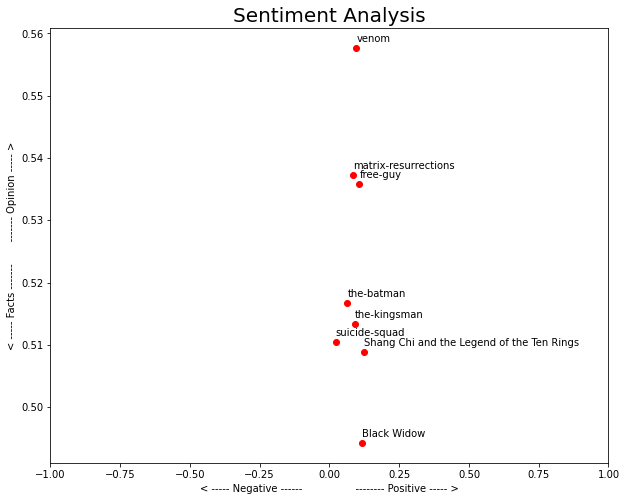

In [44]:
#plot hasil

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10,8]

for index, movie in enumerate(data_sen.index):
    x = data_sen.polarity.loc[movie]
    y = data_sen.subjectivity.loc[movie]
    plt.scatter(x, y, color = 'red')
    plt.text(x+0.001, y+0.001, data_sen['full_name'][index])
    plt.xlim(-1, 1)

plt.title("Sentiment Analysis", fontsize=20)
plt.xlabel('< ----- Negative ------                 -------- Positive ----- >')
plt.ylabel('< ----- Facts -------       ------- Opinion ----- >')

## Overtime

In [45]:
# membuat fungsi untuk split transkrip menjadi 10 bagian

import numpy as np
import math

def split_text(text, n=10):
  '''Takes in a string of text and split into x equal parts'''

  length = len(text)
  size = math.floor(length/n)
  start = np.arange(0, length, size)

  split_list = []
  for piece in range(n):
    split_list.append(text[start[piece]:start[piece]+size])
  return split_list

In [46]:
split_text(data_sen.transcript.loc['the-kingsman'])

['  as a collection of history s worst tyrants and criminal masterminds gather to plot a war to wipe out millions  one man must race against time to stop them  director  matthew vaughn based on the comic book  the secret service  by mark millar and dave gibbons produced by  matthew vaughn  david reid  adam bohling cast  ralph fiennes  gemma arterton  rhys ifans  matthew goode  tom hollander  harris dickinson  daniel brühl  with djimon hounsou  and charles dance        your grace    sergeant  i m here on behalf of the red cross and i d like to speak with general kitchener  there is no general kitchener here  your grace  your grace  let  let him in  well  if morton s here  then kitchener can t be far away  my apologies  your grace  security s paramount right now  it s a secret that you re visiting with the general  we can t be too careful with these boers and their guerilla tactics  too careful  looks like this place could use a lot more care  begging your pardon  sir  but these concentr

In [47]:
list_pieces = []
for text in data_sen.transcript:
  split = split_text(text)
  list_pieces.append(split)

In [48]:
list_pieces

[['  following the events of captain america  civil war    natasha romanoff finds herself on the run and forced to confront a dangerous conspiracy with ties to her past  pursued by a force that will stop at nothing to bring her down  romanoff must deal with her history as a spy and the broken relationships left in her wake long before she became an avenger                 ohio    girl  hey  nat        we re both upside down  and i bet you re gonna fall down first  no  you will  you can t hold it much longer      told you you d fall down first  i told you  i told you  told you so  mommy    what happened  she fell on her knee  oh  you bump your knee  young yelena  mmm hmm  oh  kiss it better  there we go              push    oh  come on  little one  get up  you re okay  come on  you re a brave girl  your pain only makes you stronger  right  you  yeah  melina  yeah  young yelena  look  forest stars  melina  yeah  you know what  those are actually part of the lampyridae family  and the glo

In [49]:
len(list_pieces)

8

In [50]:
len(list_pieces[0])

10

### hitung polaritas

In [52]:
polarity_trans = []

for lp in list_pieces:
    polarity_pieces = []
    for p in lp :
        polarity_pieces.append(TextBlob(p).sentiment.polarity)
    polarity_trans.append(polarity_pieces)

In [53]:
polarity_trans[0]

[0.12157925069510436,
 0.1462595238095238,
 0.11180046805046803,
 0.13452471139971137,
 0.09240842490842492,
 0.2067074670243685,
 0.16702569916855636,
 0.04550287455049359,
 -0.03550505050505049,
 0.15700722577588247]

Text(0.5, 1.0, 'shangchi')

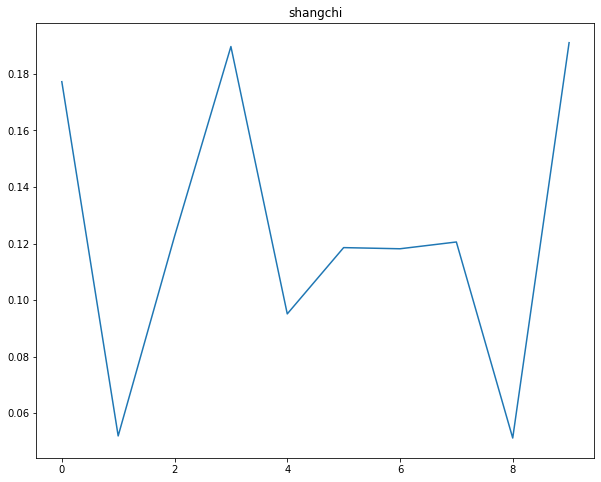

In [54]:
# plot 1 movie
plt.plot(polarity_trans[3])
plt.title(data_sen['full_name'].index[3])

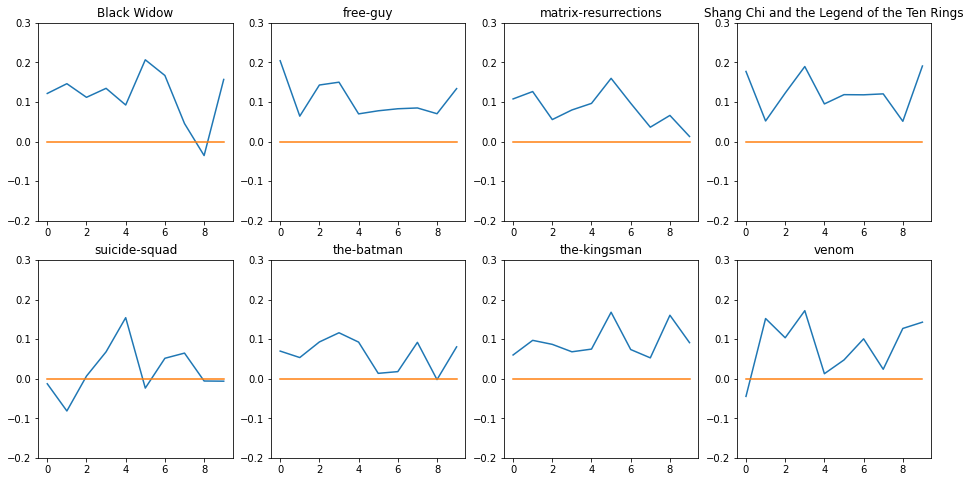

In [55]:
#plot untuk semua film
plt.rcParams['figure.figsize']= [16,8]

for index, movie in enumerate(data_sen.index):
  plt.subplot(2,4, index+1)
  plt.plot(polarity_trans[index])
  plt.plot(np.arange(0,10), np.zeros(10))
  plt.title(data_sen['full_name'][index])
  plt.ylim( ymin= -0.2, ymax=0.3)